In [1]:
import neural_net_without_autograd as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  GridSearchCV, KFold, train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
def one_hot_encoder(input, labels):
    targets = np.zeros((len(input), labels))  
    for i, t in enumerate(input):
        targets[i, t] = 1
    
    return targets

In [3]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

# Define layer sizes and activations
network_input_size =  30
layer_output_sizes = [50, 2]
activations = ['sigmoid', 'softmax']
#activations = [NNC.sigmoid, NNC.sigmoid]


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, epsilon=0.01, batch_size=10, epochs=1000))
])

# getting data for confusion matrix
pipeline.fit(X_train, one_hot_encoder(y_train, 2))
y_pred = pipeline.predict_proba(X_test)

# Evauluate the model
accuracy = pipeline.score(X_train, y_train)
print(f'Train accuracy: {accuracy:.4f}')

accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 0: Accuracy = 0.8307692307692308
Epoch 100: Accuracy = 0.9802197802197802
Epoch 200: Accuracy = 0.9824175824175824
Epoch 300: Accuracy = 0.9824175824175824
Epoch 400: Accuracy = 0.9824175824175824
Epoch 500: Accuracy = 0.9824175824175824
Epoch 600: Accuracy = 0.9846153846153847
Epoch 700: Accuracy = 0.9868131868131869
Epoch 800: Accuracy = 0.9868131868131869
Epoch 900: Accuracy = 0.989010989010989
Train accuracy: 0.9890
Test accuracy: 0.9737


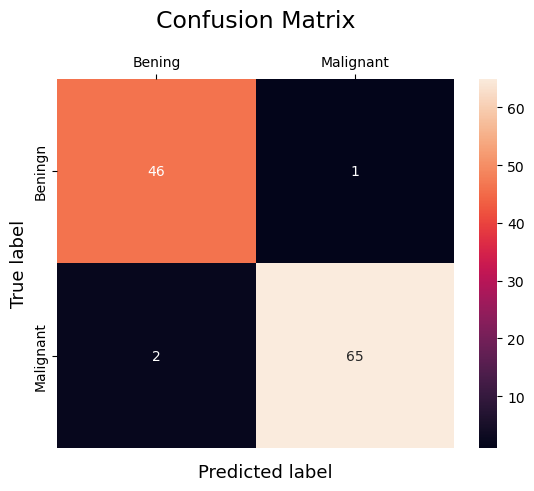

In [4]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, -1))

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'])
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20, loc='center')
ax.set(xlabel="", ylabel="True label")
ax.xaxis.tick_top()

plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()


### Gridsearch

In [5]:
k_folds = KFold(n_splits=10)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, batch_size=10, epochs=100))
])
param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
}

grid_search = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=k_folds,
                  verbose=1,
                  n_jobs=1)
gs = grid_search.fit(X_train, y_train)
print(-gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py", line 249, in fit
    self.gradient_descent(Xi, yi)
  File "c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py", line 184, in gradient_descent
    layers_grad = self.backpropagation(X, y)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py", line 202, in backpropagation
    dC_da = self.loss_func_der(predict, y)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py", line 77, in cross_ent_der
    return -target / predict
           ~~~~~~~~^~~~~~~~~
ValueError: operands could not be broadcast together with shapes (10,) (10,2) 
